In [1]:
# The following is a machine learning exploration of the Pima Indian Diabetes data set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# The data set contains 768 rows with 8 features and a binomial target, in 'Outcome'.
# In terms of Outcome the data isn't balanced, and there are quite a lot of 0 values.
# A previous look at the data indicated no null values other than the 0 values.

In [7]:
# Visualizing the summary data, looking at pairwise correlation, and digging deeper into some of the features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e413690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110dd4650>]], dtype=object)

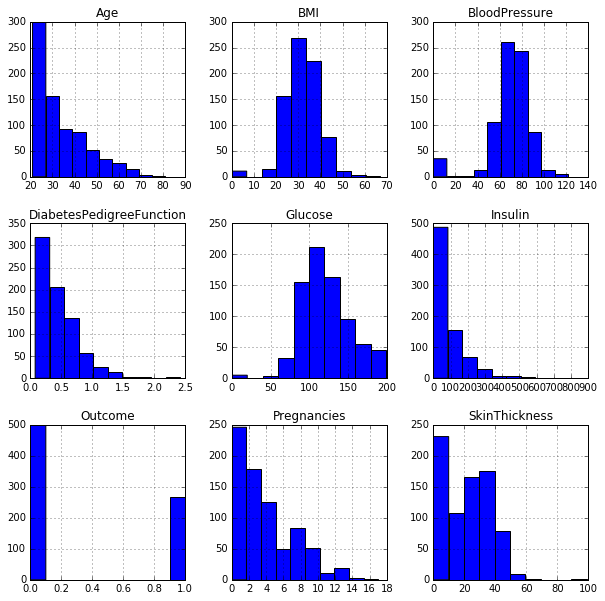

In [8]:
df.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11188f490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116255f10>]], dtype=object)

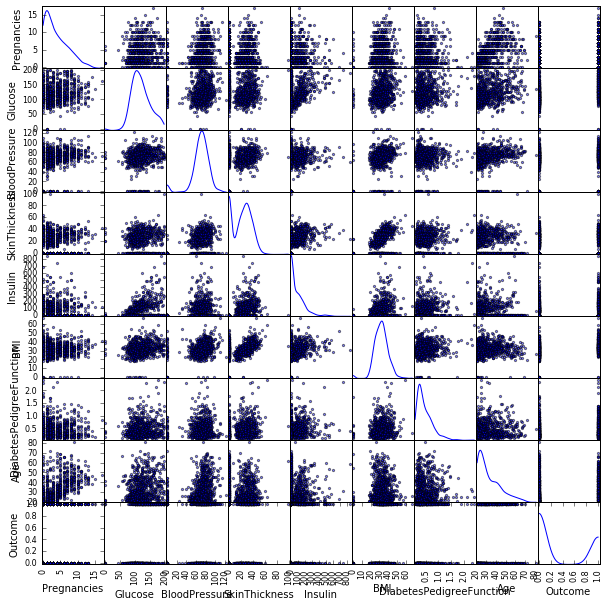

In [9]:
pd.scatter_matrix(df, diagonal='kde', figsize=((10,10)))

Outcome
0    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
1    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
dtype: object

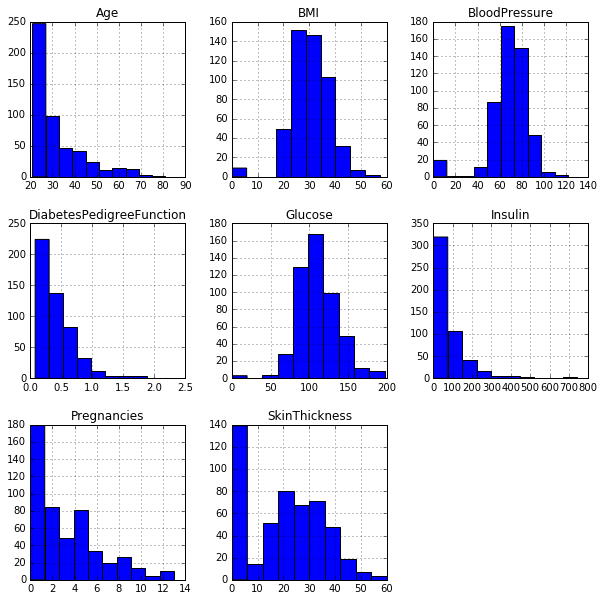

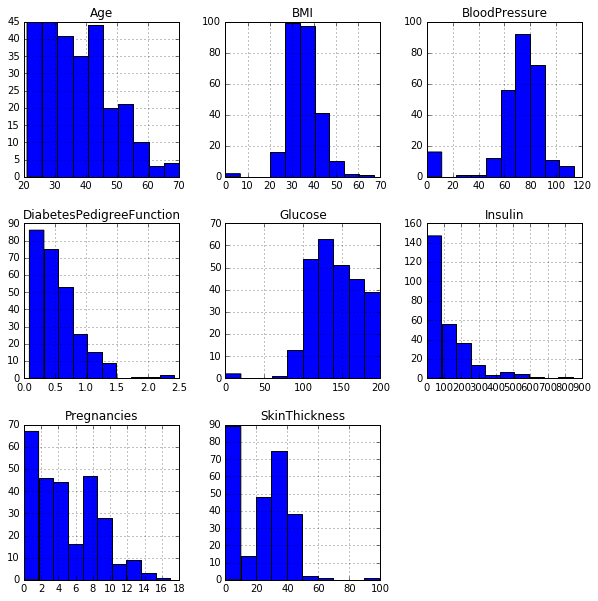

In [10]:
df.groupby('Outcome').hist(figsize=(10,10))

Outcome
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

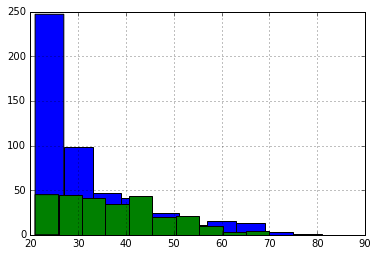

In [11]:
df.groupby('Outcome').Age.hist(bins=10)

Outcome
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Glucose, dtype: object

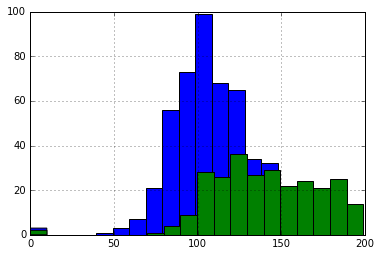

In [12]:
df.groupby('Outcome').Glucose.hist(bins=20)

In [13]:
# We'll use this knowledge later in feature engineering
# Now let's build an initial Logistic Regressioin model
# Leaving in all the features, and not doing any additional data manipulation

In [14]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[cols]
y = df['Outcome']

In [15]:
# Base classifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
kfold = KFold(n_splits=10)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())

Accuracy: 0.770 (0.048)


In [16]:
# Run cross val exploration on a number of other models as a check on model selection

from sklearn import tree
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import svm

In [17]:
print "\nDECISION TREE\n"
decision_tree_clf = tree.DecisionTreeClassifier()
decision_tree_scores = cross_val_score(decision_tree_clf, X, y, cv=kfold)
print "Mean: {}".format(decision_tree_scores.mean())
print "Std Dev: {}".format(np.std(decision_tree_scores))

print "\nRANDOM FOREST\n"
random_forest_clf = ensemble.RandomForestClassifier(n_estimators=5)
random_forest_scores = cross_val_score(random_forest_clf, X, y, cv=kfold)
print "Mean: {}".format(random_forest_scores.mean())
print "Std Dev: {}".format(np.std(random_forest_scores))

print "\nkNN\n"
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=7)
knn_scores = cross_val_score(knn_clf, X, y, cv=kfold)
print "Mean: {}".format(knn_scores.mean())
print "Std Dev: {}".format(np.std(knn_scores))

print "\nSVC\n"
svc_clf = svm.LinearSVC(C=50)
svc_scores = cross_val_score(svc_clf, X, y, cv=kfold)
print "Mean: {}".format(svc_scores.mean())
print "Std Dev: {}".format(np.std(svc_scores))


DECISION TREE

Mean: 0.696496924129
Std Dev: 0.0624307744103

RANDOM FOREST

Mean: 0.708270676692
Std Dev: 0.0626390963235

kNN

Mean: 0.744805194805
Std Dev: 0.0568914184774

SVC

Mean: 0.626298701299
Std Dev: 0.118232203474


In [18]:
# Ok, continuing with Logistic Regression for now. We'll run some ensemble methods a bit later
# 77% accuracy on this data set turns out to be pretty good. The standard error was .48 as well, also good.
# We will do some pre-processing, feature engineering, and other model tuning to see if we can improve on that.

In [20]:
df2 = df.copy()

In [24]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=0, strategy='mean', axis=1)
temp = imp.fit_transform(df2[['Glucose', 'BMI']])
df2[['Glucose', 'BMI']] = temp

In [25]:
X1 = df2[cols]
y1 = df2['Outcome']

In [26]:
# There are a lot too many 0 values in SkinThickness and Insulin to mean-impute

In [29]:
# second model pass
model2 = LogisticRegression()
results2 = cross_val_score(model2, X1, y1, cv=kfold, scoring=scoring)
print results2
print("Accuracy: %.3f (%.3f)") % (results2.mean(), results2.std())

[ 0.66233766  0.79220779  0.68831169  0.68831169  0.76623377  0.76623377
  0.84415584  0.80519481  0.77631579  0.80263158]
Accuracy: 0.759 (0.057)


In [30]:
# not better

In [31]:
# scaling data 
from sklearn.preprocessing import scale
df3 = scale(df[cols])

In [32]:
# scaling the data means all the features are in the same space, which may help
df3[0]

array([ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
        0.20401277,  0.46849198,  1.4259954 ])

In [33]:
model3 = LogisticRegression()
results3 = cross_val_score(model3, df3, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)") % (results3.mean(), results3.std())

Accuracy: 0.780 (0.050)


In [35]:
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 30
model4 = AdaBoostClassifier(model3, n_estimators=num_trees, random_state=seed)
results4 = cross_val_score(model4, df3, y, cv=kfold)
print("Accuracy: %.3f (%.3f)") % (results4.mean(), results4.std())

Accuracy: 0.771 (0.056)


In [37]:
# Stochastic Gradient Boosting Classification
from sklearn.ensemble import GradientBoostingClassifier
model5 = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results5 = cross_val_score(model5, df3, y, cv=kfold)
print("Accuracy: %.3f (%.3f)") % (results5.mean(), results5.std())

Accuracy: 0.773 (0.065)


In [38]:
#Scaling has helped a bit, but not imputing

In [39]:
# On to feature engineering

In [40]:
Z = df3.copy()

In [43]:
Z = pd.DataFrame(Z)

In [45]:
Z.columns = [cols]

In [46]:
# Used with thanks from kaggle.com/lejustin/

# Insulin >= 200
Z['insulin_geq_200'] = np.where(Z['Insulin'] >= 200, 1, 0)

# BMI >= 48
Z['bmi_geq_48'] = np.where(Z['BMI'] >= 48, 1, 0)

# Diabetes Pedigree Function >= 1
Z['pedigree_geq_1'] = np.where(Z['DiabetesPedigreeFunction'] >= 1.0, 1, 0)

# Glucose >= 160
Z['glucose_geq_160'] = np.where(Z['Glucose'] >= 160, 1, 0)

# Blood Pressure >= 92
Z['blood_geq_92'] = np.where(Z['BloodPressure'] >= 92, 1, 0)

# > 6 pregnancies
Z['preg_5'] = np.where(Z['Pregnancies'] >= 5, 1, 0)

# Age <= 28
Z['age_leq_28'] = np.where(Z['Age'] <= 28, 1, 0)

# Age is 52 or 53
Z['age_52_or_53'] = np.where(Z['Age'] == 52, 1, 0) +\
                       np.where(Z['Age'] == 53, 1, 0)


In [47]:
model6 = LogisticRegression()
results6 = cross_val_score(model6, Z, y, cv=kfold, scoring=scoring)
print results6
print("Accuracy: %.3f (%.3f)") % (results6.mean(), results6.std())

[ 0.68831169  0.83116883  0.75324675  0.7012987   0.77922078  0.79220779
  0.84415584  0.83116883  0.76315789  0.80263158]
Accuracy: 0.779 (0.051)


In [48]:
# Thus, 78% accuracy using Logistic Regression on scaled data has achieved the best result

In [49]:
# Fit the data to evaluate goodness

In [50]:
from sklearn.model_selection import train_test_split
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.5, random_state=seed)

In [53]:
from sklearn.metrics import log_loss, roc_auc_score, f1_score, accuracy_score

model6_fit = model6.fit(Z_train, y_train)
model6_pred = model6_fit.predict(Z_test)

print("="*80)
print("\nLogistic regression performance on unseen data:")
print("\nlog-loss: %.4f" % log_loss(y_test, model6_pred))
print("\nAUC: %.4f" % roc_auc_score(y_test, model6_pred))
print("\nF1 score: %.4f" % f1_score(y_test, model6_pred))
print("\nAccuracy: %.4f" % accuracy_score(y_test, model6_pred))
print("="*80)


Logistic regression performance on unseen data:

log-loss: 7.3755

AUC: 0.7460

F1 score: 0.6667

Accuracy: 0.7865


In [54]:
# Not too bad. Improved over base model by 1.65 points. 
# In earlier model trials, saw an improvement in log-loss of 1 point as well.

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
print("="*80)
print("\nLogistic regression performance on unseen data cont'd:")
print"\nConfusion matrix:" 
print confusion_matrix(y_test, model6_pred)
print"\nClassification report:"
print classification_report(y_test, model6_pred)
print("="*80)


Logistic regression performance on unseen data cont'd:

Confusion matrix:
[[220  30]
 [ 52  82]]

Classification report:
             precision    recall  f1-score   support

          0       0.81      0.88      0.84       250
          1       0.73      0.61      0.67       134

avg / total       0.78      0.79      0.78       384



In [56]:
# precision and recall on average are decent
# However, the model still does not perfrom well on the positive case
# In researching this topic, I've learned in the real world that diabetes is hard to predict
# There are many factors, and the strength of this data model might be improved by additional features in the future